In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import Holt
from ipywidgets import interact, widgets
import os 
os.chdir("C:/Python/Datasets")

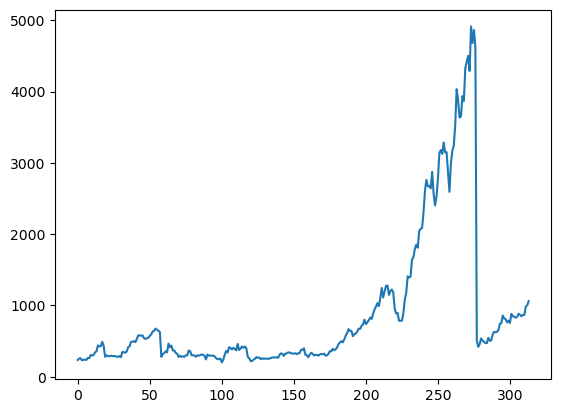

In [3]:
df = pd.read_csv("500820.csv")
df['Close Price'].plot()
plt.show()

In [4]:
y_train = df['Close Price'].iloc[:-12]
y_test = df['Close Price'].iloc[-12:]
y_train.shape, y_test.shape

((302,), (12,))

In [5]:
ses = SimpleExpSmoothing(y_train)
def simple_exp(alpha):
    fit1 = ses.fit(smoothing_level=alpha)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(simple_exp, alpha=(0.01, 1, 0.01))

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), Output()), _d…

<function __main__.simple_exp(alpha)>

In [6]:
def holt_both(alpha, beta, exponentiality):
    holt = Holt(y_train, exponential=exponentiality)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE = {rmse:.5f}, alpha = {alpha:.2f}, beta = {beta:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(holt_both, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01),
                 exponentiality=[True, False])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.holt_both(alpha, beta, exponentiality)>

In [ ]:
def damped(alpha, beta, phi, exponentiality, dampness):
    holt = Holt(y_train, exponential=exponentiality, damped_trend=dampness)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, damping_trend=phi)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}, beta = {beta:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(damped, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01),phi=(0.01, 1, 0.01),
                 exponentiality=[True, False], dampness=[True, False])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.damped(alpha, beta, phi, exponentiality, dampness)>

#### Beer Production

In [9]:
beer = pd.read_csv("monthly-beer-production-in-austr.csv")
y = beer['Monthly beer production']
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]
y_train.shape, y_test.shape

((464,), (12,))

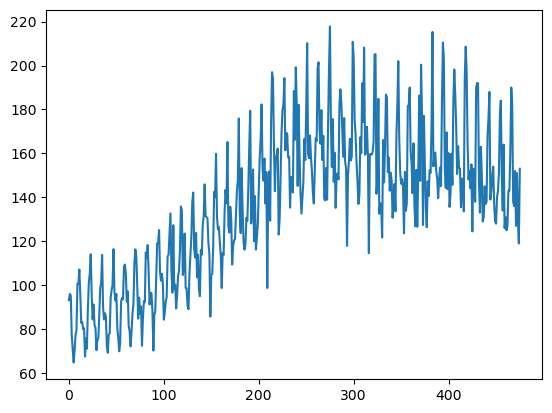

In [10]:
y.plot()
plt.show()

In [12]:
def hw(alpha, beta, gamma, seasonality, periods=12):
    holt = ExponentialSmoothing(y_train, trend='add', seasonal=seasonality,seasonal_periods=periods)
    fit1 = holt.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color="pink", label='Test')
    fcast1.plot(color="purple", label='Forecast')
    rmse = root_mean_squared_error(y_test, fcast1)
    plt.title(f"RMSE={rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f}")
    plt.legend(loc='best')
    plt.show()
widgets.interact(hw, alpha=(0.01, 1, 0.01), beta=(0.01, 1, 0.01),gamma=(0.01, 1, 0.01),
                 seasonality=['add', 'mul'])

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.hw(alpha, beta, gamma, seasonality, periods=12)>

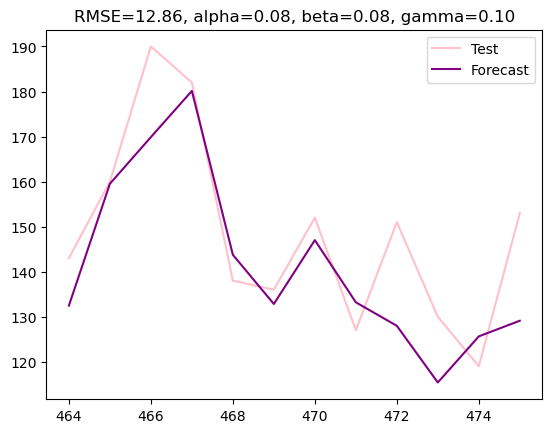

In [17]:
holt = ExponentialSmoothing(y_train, trend='add', seasonal='add',seasonal_periods=12)
fit1 = holt.fit()
alpha, beta = fit1.params['smoothing_level'], fit1.params['smoothing_trend']
gamma = fit1.params['smoothing_seasonal']
fcast1 = fit1.forecast(len(y_test))
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
rmse = root_mean_squared_error(y_test, fcast1)
plt.title(f"RMSE={rmse:.2f}, alpha={alpha:.2f}, beta={beta:.2f}, gamma={gamma:.2f}")
plt.legend(loc='best')
plt.show()

In [16]:
fit1.params

{'smoothing_level': 0.07517312097182596,
 'smoothing_trend': 0.07517312097156535,
 'smoothing_seasonal': 0.09678736273804124,
 'damping_trend': nan,
 'initial_level': 86.23465883869333,
 'initial_trend': -0.007820256596822566,
 'initial_seasons': array([  5.31392593,  -2.16140325,   5.21691216,  -7.16188244,
        -11.09466473, -22.44328407, -14.63709378,  -8.86755821,
         -1.55947801,  12.61811959,  18.25936162,  27.7297432 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}